In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("TRPM8-homosapien-compounds-activities-processed.csv")
df = df.loc[(df['pChEMBL Value'] <= 12) & (df['pChEMBL Value'] >= 2), ["Molecule ChEMBL ID", "Smiles", "pChEMBL Value"]].drop_duplicates()
def convertToTarget(x):
    # print(type(x))
    if x['pChEMBL Value'] < 5:
        return 0
    if x['pChEMBL Value'] <= 7:
        return 1
    return 2
df["target"] = df.apply(convertToTarget, axis = 1)

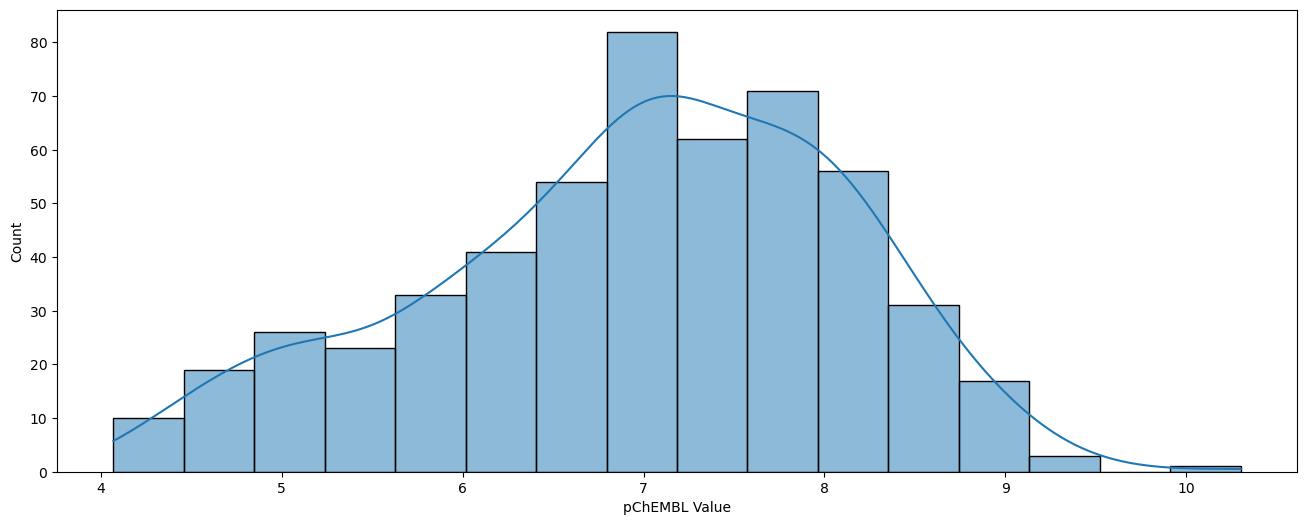

In [29]:
plt.figure(figsize = (16,6))
sns.histplot(df["pChEMBL Value"], kde = True)
plt.show()

In [80]:
import rdkit
for i in range(df.shape[0]):
    mol = rdkit.Chem.MolFromSmiles(df.iloc[i,1])
    print(mol.GetRingInfo().BondRings())
    for atom in mol.GetAtoms():
        print(atom.GetChiralTag()) 
    #Chirality should be for molecule?

((30, 29, 5, 4, 3, 2), (11, 12, 33, 18, 31, 10), (14, 15, 16, 17, 33, 13), (21, 22, 27, 28, 32, 20))
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_TETRAHEDRAL_CW
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
((29, 13, 31, 7, 6, 5), (9, 10, 11, 12, 31, 8), (16, 17, 22, 24, 30, 15))
CHI_UNSPECIFIED
CHI_TETRAHEDRAL_CCW
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_TETRAHEDRAL_CW
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED
CHI_UNSPECIFIED

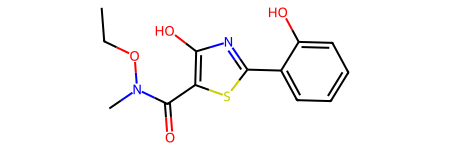

In [101]:
rdkit.Chem.MolFromSmiles(df.iloc[i,1])